In [ ]:
import pandas as pd

# Load the datasets
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')

# Display the first few rows of each dataframe
print("Links DataFrame:")
print(links_df.head())

print("\nMovies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nTags DataFrame:")
print(tags_df.head())

Links DataFrame:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating    timestamp
0       1        1     4.0  964982703.0
1       1        3     4.0  964981247.0
2       1        6     4.0  964982224.0
3       1       47   

<ipython-input-3-78ceee36207b>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<Figure size 640x480 with 0 Axes>

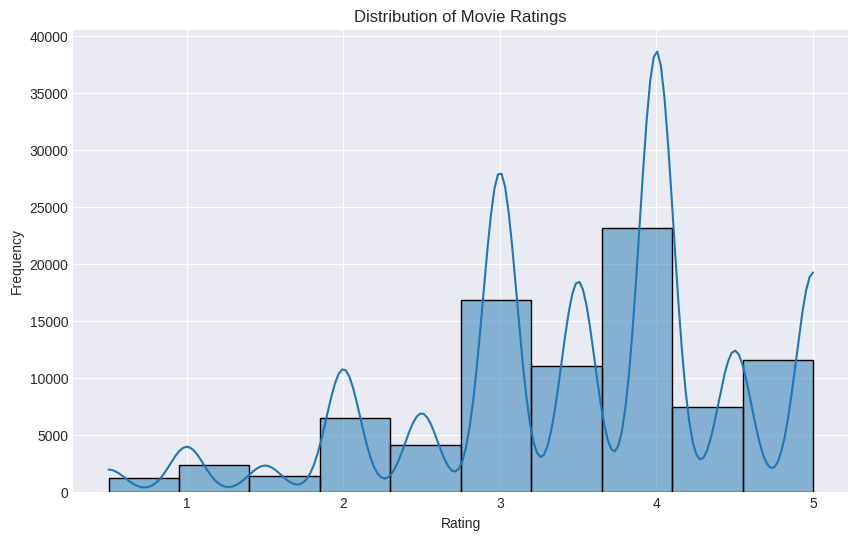

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

tqdm.pandas()

# Converting timestamps
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
tags_df['timestamp'] = pd.to_datetime(tags_df['timestamp'], unit='s')

# Set plot style
plt.style.use('seaborn-darkgrid')
plt.figure(facecolor='white')

# Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

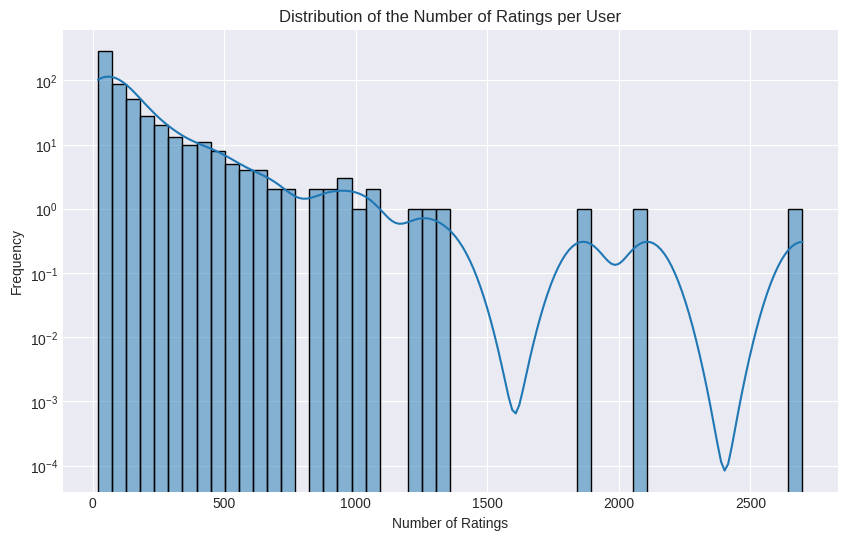

Average number of movies rated by users: 153.9187725631769


In [ ]:
#  Distribution of the number of ratings per user
ratings_per_user = ratings_df.groupby('userId').size()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title('Distribution of the Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

# Average number of movies rated by users
average_ratings_per_user = ratings_per_user.mean()
print('Average number of movies rated by users:', average_ratings_per_user)

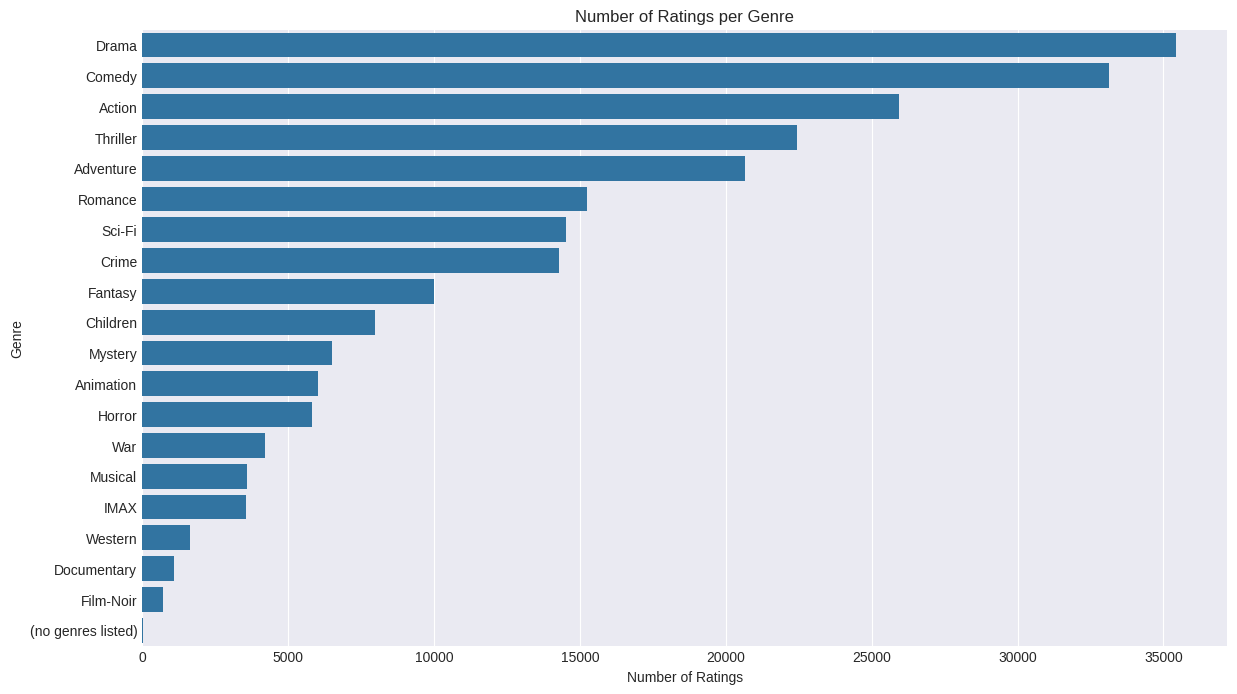

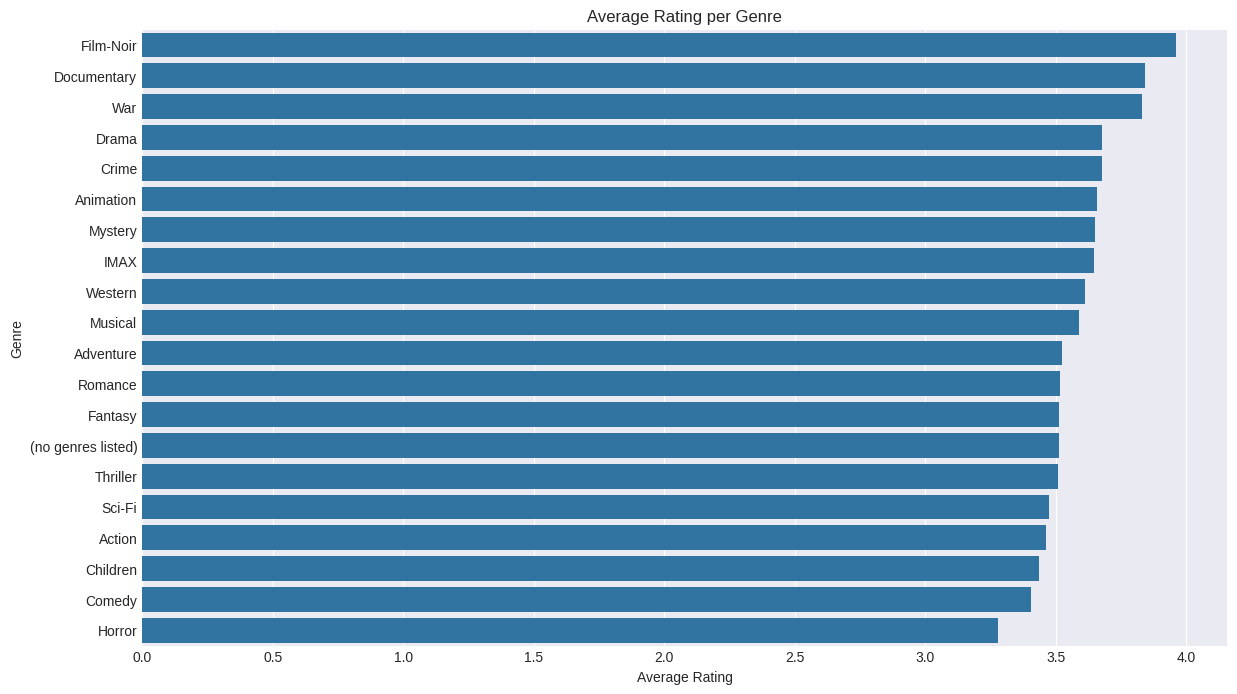

In [ ]:
# Merging movies and genre
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movieId')

# Split genres for one per row
movies_ratings_df['genres'] = movies_ratings_df['genres'].str.split('|')
movies_ratings_df = movies_ratings_df.explode('genres')

# Average rating per genre
genre_popularity = movies_ratings_df.groupby('genres').agg(
    num_ratings=('rating', 'size'),
    avg_rating=('rating', 'mean')
).reset_index()

# Plotting the number of ratings per genre
plt.figure(figsize=(14, 8))
sns.barplot(x='num_ratings', y='genres', data=genre_popularity.sort_values('num_ratings', ascending=False))
plt.title('Number of Ratings per Genre')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.show()

# Plotting the average rating per genre
plt.figure(figsize=(14, 8))
sns.barplot(x='avg_rating', y='genres', data=genre_popularity.sort_values('avg_rating', ascending=False))
plt.title('Average Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

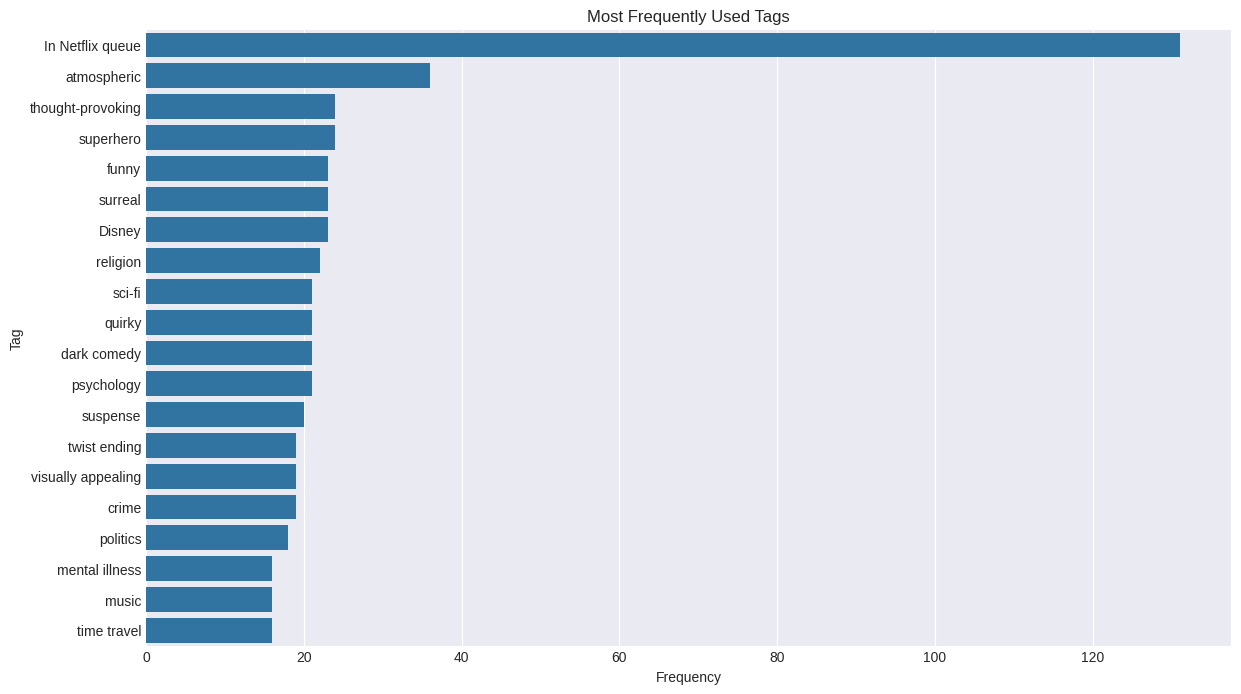

In [ ]:
# Most frequently used tags
most_frequent_tags = tags_df['tag'].value_counts().head(20) #took the first twenty

plt.figure(figsize=(14, 8))
sns.barplot(x=most_frequent_tags.values, y=most_frequent_tags.index)
plt.title('Most Frequently Used Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

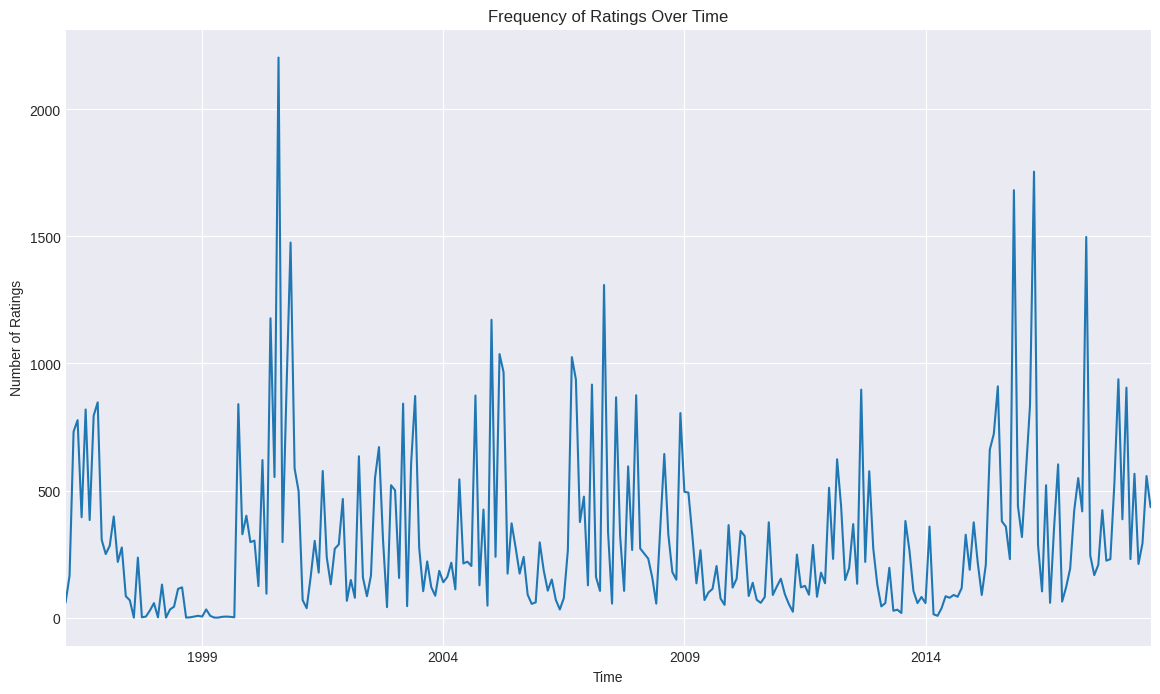

In [ ]:
# Frequency of ratings over time
ratings_over_time = ratings_df.set_index('timestamp').resample('M').size()

plt.figure(figsize=(14, 8))
ratings_over_time.plot()
plt.title('Frequency of Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()

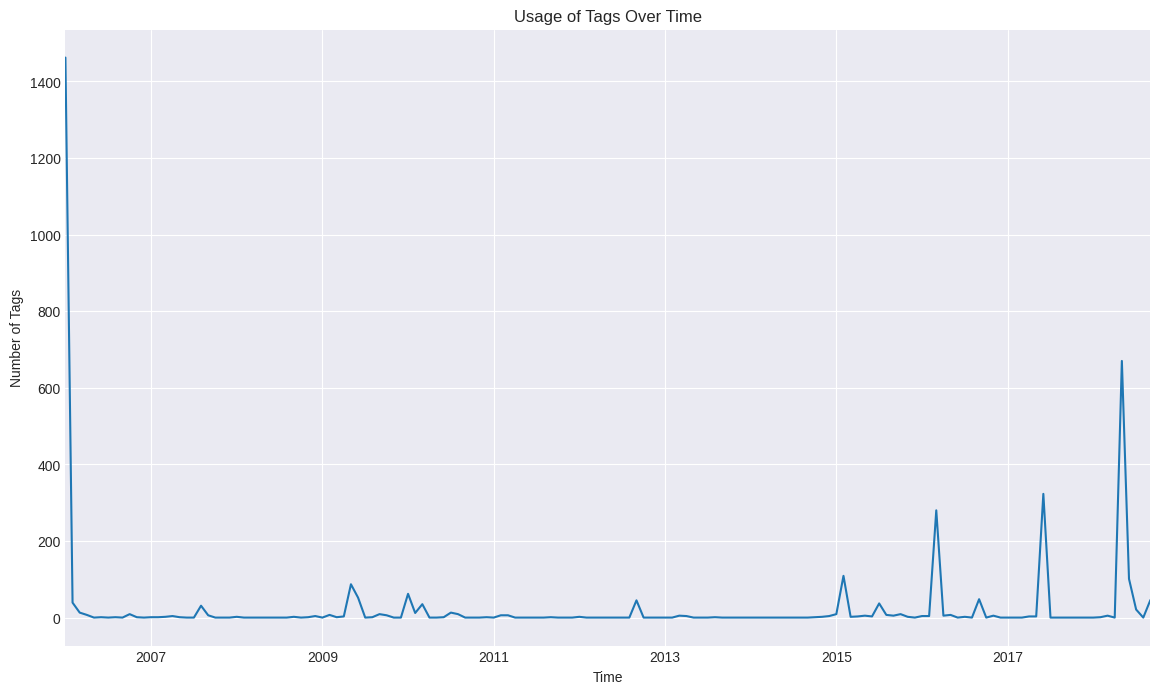

In [ ]:
tags_over_time = tags_df.set_index('timestamp').resample('M').size()

plt.figure(figsize=(14, 8))
tags_over_time.plot()
plt.title('Usage of Tags Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Tags')
plt.show()

In [ ]:
# Merging the tags and movies
merged_tags = pd.merge(tags_df, movies_df, on='movieId')

# Grouping the cols
user_tag_counts = merged_tags.groupby(['userId', 'tag'])['movieId'].nunique().reset_index()
user_tag_counts.columns = ['userId', 'tag', 'unique_movie_count']

# avg. number of tagged movies
average_unique_movies_per_tag = user_tag_counts.groupby('userId')['unique_movie_count'].mean().reset_index()

# User consistency (average unique movies per tag > 1 indicates consistency)
consistent_tagging_users = average_unique_movies_per_tag[average_unique_movies_per_tag['unique_movie_count'] > 1]

print('Number of users showing consistency in their tagging:', consistent_tagging_users['userId'].nunique())
print('Percentage of users showing consistency in their tagging:', (consistent_tagging_users['userId'].nunique() / average_unique_movies_per_tag['userId'].nunique()) * 100)

Number of users showing consistency in their tagging: 20
Percentage of users showing consistency in their tagging: 34.48275862068966


In [ ]:
# Calculating the average ratings
movie_avg_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()
movie_avg_ratings.columns = ['movieId', 'average_rating']

movie_avg_ratings = pd.merge(movie_avg_ratings, movies_df, on='movieId')

# Sorting in descending order
highest_rated_movies = movie_avg_ratings.sort_values(by='average_rating', ascending=False).head(10)

print(highest_rated_movies[['title', 'average_rating', 'genres']])

                                           title  average_rating  \
6556       Mickey's Once Upon a Christmas (1999)             5.0   
8093            Nasu: Summer in Andalusia (2003)             5.0   
8050                  Big Top Scooby-Doo! (2012)             5.0   
8051            Scooby-Doo Goes Hollywood (1979)             5.0   
8053          George Carlin: Back in Town (1996)             5.0   
8054  George Carlin: You Are All Diseased (1999)             5.0   
8056    Larry David: Curb Your Enthusiasm (1999)             5.0   
8058    Tom and Jerry: Shiver Me Whiskers (2006)             5.0   
8071                    The Eye: Infinity (2005)             5.0   
8074                              Villain (1971)             5.0   

                         genres  
6556   Animation|Comedy|Fantasy  
8093                  Animation  
8050  Animation|Children|Comedy  
8051  Animation|Children|Comedy  
8053                     Comedy  
8054                     Comedy  
8056         

In [ ]:
# ratings for each movie
movie_rating_counts = ratings_df.groupby('movieId')['rating'].count().reset_index()
movie_rating_counts.columns = ['movieId', 'rating_count']

# Merging to get movie titles and genres
movie_rating_counts = pd.merge(movie_rating_counts, movies_df, on='movieId')

# Sort by rating count in descending order
most_rated_movies = movie_rating_counts.sort_values(by='rating_count', ascending=False).head(10)

# Average ratings to compare
most_rated_movies = pd.merge(most_rated_movies, movie_avg_ratings[['movieId', 'average_rating']], on='movieId')

print(most_rated_movies[['title', 'rating_count', 'average_rating', 'genres']])

                                       title  rating_count  average_rating  \
0                        Forrest Gump (1994)           290        4.181034   
1           Shawshank Redemption, The (1994)           287        4.419861   
2                        Pulp Fiction (1994)           274        4.177007   
3                         Matrix, The (1999)           250        4.152000   
4           Silence of the Lambs, The (1991)           248        4.151210   
5  Star Wars: Episode IV - A New Hope (1977)           224        4.216518   
6                       Jurassic Park (1993)           211        3.722749   
7                          Braveheart (1995)           206        4.014563   
8          Terminator 2: Judgment Day (1991)           199        3.949749   
9                          Fight Club (1999)           197        4.263959   

                             genres  
0          Comedy|Drama|Romance|War  
1                       Crime|Drama  
2       Comedy|Crime|Drama|

In [ ]:
# Checking for errors
movies_df = pd.read_csv('movies.csv')
print(movies_df.head())
print(movies_df.info())
print(movies_df.isnull().sum())
print(movies_df.duplicated().sum())
print(movies_df['title'].duplicated().sum())
print(movies_df[movies_df['title'].duplicated(keep=False)])
unique_genres = set()
movies_df['genres'].str.split('|').apply(unique_genres.update)
print(unique_genres)

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
movieId    0
title      0
genres     0
dtype: int64
0
5
 

In [ ]:
# Fixing the duplicates
import pandas as pd
movies_df = movies_df.drop_duplicates(subset='title', keep='first')
movies_df.to_csv('cleaned_movies.csv', index=False)

print('Duplicate movie titles removed and cleaned data saved to cleaned_movies.csv')

Duplicate movie titles removed and cleaned data saved to cleaned_movies.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

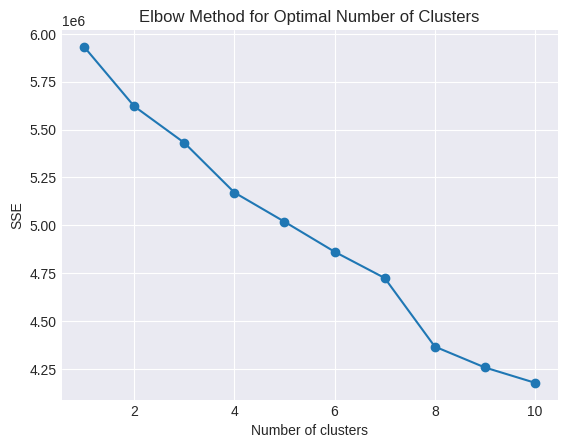

In [ ]:
# Forming the clusters

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

ratings_df = pd.read_csv('ratings.csv')

# Creating a user-item matrix
user_item_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating')

# Fill missing values with 0 (assuming no rating means 0)
user_item_matrix = user_item_matrix.fillna(0)

# Normalize the data
scaler = StandardScaler()
user_item_matrix_scaled = scaler.fit_transform(user_item_matrix)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_item_matrix_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(facecolor='white')
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

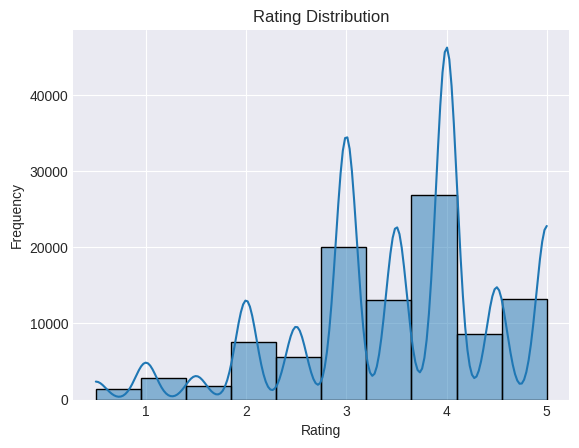

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [ ]:
# Finding the rating summary
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the datasets
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Rating Distribution
plt.figure(facecolor='white')
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Summary Statistics
rating_summary = ratings_df['rating'].describe()
print(rating_summary)

In [ ]:
# User Behavior
user_ratings_count = ratings_df.groupby('userId').size()
user_ratings_summary = user_ratings_count.describe()

# Most active users
most_active_users = user_ratings_count.sort_values(ascending=False).head(10)

# Average rating per user
average_rating_per_user = ratings_df.groupby('userId')['rating'].mean()

print(user_ratings_summary)
print(most_active_users)
print(average_rating_per_user.head())

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
dtype: float64
userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
dtype: int64
userId
1    4.366379
2    3.948276
3    2.435897
4    3.555556
5    3.636364
Name: rating, dtype: float64


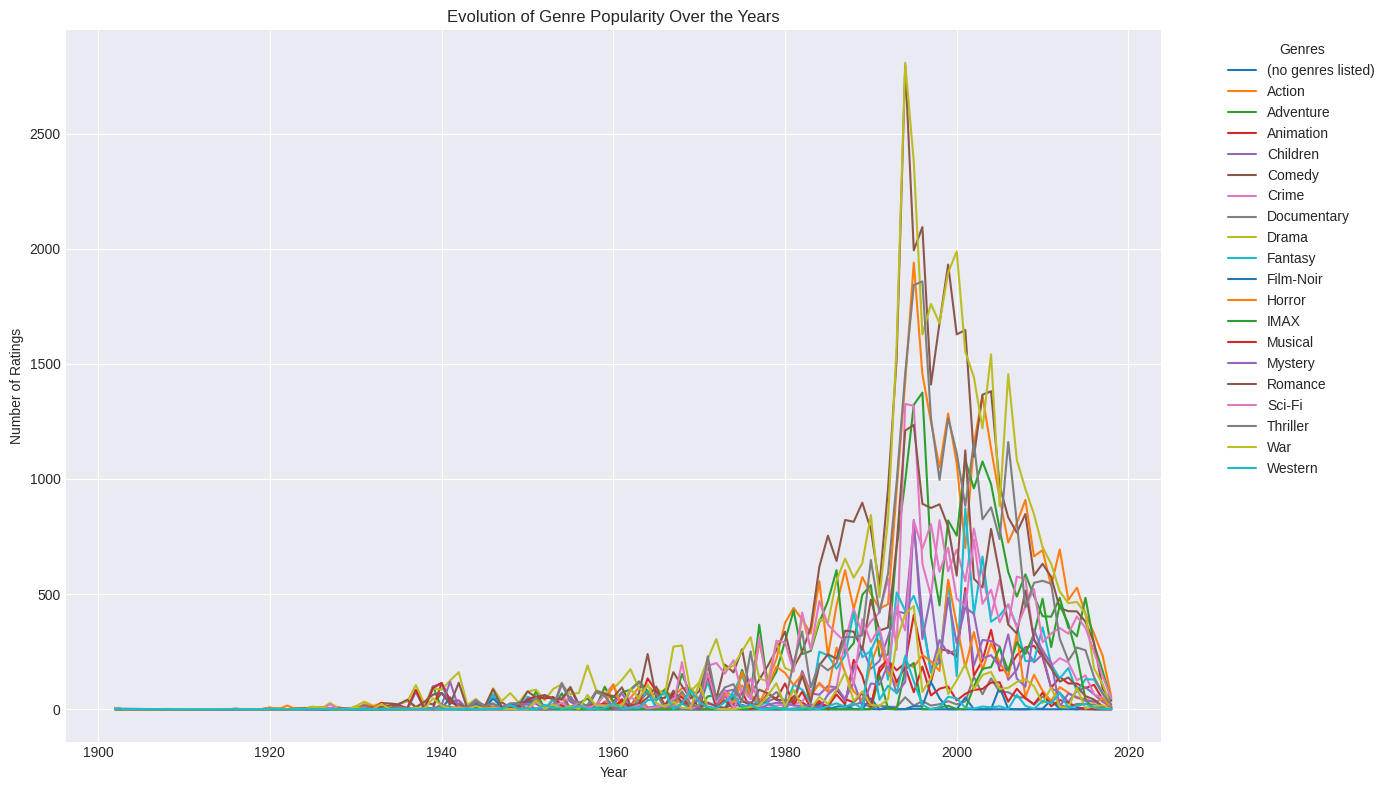

In [ ]:
# Extract the year from the movie titles
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')[0]
movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')

# Merge ratings with movies to get genres and years
ratings_with_movies = pd.merge(ratings_df, movies_df, on='movieId')

# Explode genres to count each genre separately
ratings_with_movies['genres'] = ratings_with_movies['genres'].str.split('|')
ratings_with_movies = ratings_with_movies.explode('genres')

# Count the number of ratings per genre per year
genre_popularity = ratings_with_movies.groupby(['year', 'genres']).size().reset_index(name='count')

# Pivot the table to have years as rows and genres as columns
genre_popularity_pivot = genre_popularity.pivot(index='year', columns='genres', values='count').fillna(0)

# Plot the evolution of genre popularity over the years
plt.figure(figsize=(14, 8), facecolor='white')
genre_popularity_pivot.plot(ax=plt.gca())
plt.title('Evolution of Genre Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()